In [5]:
import pandas as pd
import numpy as np

import datetime as dt
import matplotlib.pyplot as pyplt
from datetime import timedelta

%matplotlib inline

first_stock = 's_n_p_500_historical_data.csv'
second_stock = 'nasdaq_historical_data.csv'
SAMPLING_RATE = 'M'

In [6]:
df_SAIL = pd.read_csv(first_stock)
df_JSW = pd.read_csv(second_stock)

df_SAIL.head()
#print(df_SAIL[['Date', 'Open', 'High', 'Low', 'Close']][:3])
#print(df_JSW[['Date', 'Open', 'High', 'Low', 'Close']][:3])


,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [7]:
df_JSW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4506 entries, 0 to 4505
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4506 non-null   object 
 1   Open       4506 non-null   float64
 2   High       4506 non-null   float64
 3   Low        4506 non-null   float64
 4   Close      4506 non-null   float64
 5   Adj Close  4506 non-null   float64
 6   Volume     4506 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 246.5+ KB


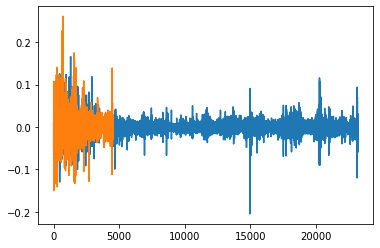

In [8]:
#Add a new column for daily return on closing price to each dataframe
df_SAIL['dailyret'] = df_SAIL['Close'].pct_change(1)
df_JSW['dailyret'] = df_JSW['Close'].pct_change(1)

#plot
df_SAIL['dailyret'].plot()
df_JSW['dailyret'].plot()

In [9]:
#Index the dataframes
df_JSW.set_index(df_JSW['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d')), drop=True, inplace=True)

df_SAIL.set_index(df_SAIL['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d')), drop=True, inplace=True)

In [ ]:
df_SAIL = df_SAIL.resample(SAMPLING_RATE).mean()
df_JSW = df_JSW.resample(SAMPLING_RATE).mean()

In [145]:
# #Filter by date to view the anomaly
# start_date = '01-Jan-2017'
# end_date = '10-Jan-2017'
# startdate = pd.to_datetime(start_date)
# enddate = pd.to_datetime(end_date)
# df_JSW['dailyret'][startdate:enddate].plot()
 


# #The anomaly lies on the 4th of Jan 2017, as is observed from the data. Let's have a look at the data around this date.

# df_JSW[startdate:enddate][:3]

# #Delete a few columns that are not needed and have a look at the data.


In [146]:
df_SAIL.head()

,Date,Open,High,Low,Close,Adj Close,Volume,dailyret
Date,,,,,,,,
1927-12-30,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,NaN
1928-01-03,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,0.005663
1928-01-04,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,-0.002252
1928-01-05,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,-0.009594
1928-01-06,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.006268


In [147]:
#Analyze correlation between stocks of the same sector
df_JSW['dailyret'] = df_JSW['Close'].pct_change(1)

#3. Multiply the daily return deviation
#4. Divide by the number of rows to arrive at covariance

#5. Further , Calculate the correlation co-efficient from covariance
#6. Calculate standard deviation of Daily return of each stock

#1. Calculate mean of daily return
jsw_dailyret_mean =  df_JSW['dailyret'].mean()
sail_daily_ret_mean = df_SAIL['dailyret'].mean()

print("JSW Daily Return Average : " , jsw_dailyret_mean * 10000 , " basis points ")
print("SAIL Daily Return Average : " , sail_daily_ret_mean * 10000 , " basis points ")

#JSW Daily Return Average :  14.6521291185  basis points 
#SAIL Daily Return Average :  26.5038546269  basis 

JSW Daily Return Average :  7.744355346607332  basis points 
SAIL Daily Return Average :  2.94889662925862  basis points 


In [148]:
#2. Calculate deviation from the mean for each row for each dataframe
df_JSW['dailyret dev'] = df_JSW['dailyret'].apply(lambda x : x - jsw_dailyret_mean )
df_SAIL['dailyret dev'] = df_SAIL['dailyret'].apply(lambda x : x - sail_daily_ret_mean )

print(df_JSW['dailyret dev'][:3])
print(df_SAIL['dailyret dev'][:3])

Date
2002-07-01         NaN
2002-07-02    0.007892
2002-07-03   -0.009367
Name: dailyret dev, dtype: float64
Date
1927-12-30         NaN
1928-01-03    0.005368
1928-01-04   -0.002547
Name: dailyret dev, dtype: float64


In [149]:
min_date = max(df_JSW.index[0], df_SAIL.index[0])
max_date = min(df_JSW.index[-1], df_SAIL.index[-1])
display([min_date, max_date])

[Timestamp('2002-07-01 00:00:00'), Timestamp('2020-05-22 00:00:00')]

In [150]:
df_SAIL = df_SAIL[min_date <= pd.to_datetime(df_SAIL['Date'])][pd.to_datetime(df_SAIL['Date']) <= max_date]
df_JSW = df_JSW[min_date <= pd.to_datetime(df_JSW['Date'])][pd.to_datetime(df_JSW['Date']) <= max_date]

/mnt/home/tomer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [151]:
dev_sail_jsw_steel =  df_SAIL['dailyret dev'][1:]  * df_JSW['dailyret dev'][1:]
cov_sail_jsw_steel = sum(dev_sail_jsw_steel) / (len(df_SAIL) - 1)
print("Covariance of Daily Return : ",  cov_sail_jsw_steel)

#Covariance of Daily Return :  0.000281631199282

Covariance of Daily Return :  0.00017480767632562741


In [152]:
sigma_jsw = df_JSW['dailyret'].std()
sigma_sail = df_SAIL['dailyret'].std()
coeff_cor = cov_sail_jsw_steel / (sigma_jsw * sigma_sail)
print(coeff_cor)

#0.626551516998
# Interpretation
#A value of 0.62 indicates a relatively strong correlation between the two equities. This implies that the daily return of the two equities , typically moves in the same direction. 
 
 



0.5522574746640434
